#Exploratory Data Analytics Kasus Covid 19

##Project Background
Project kali ini bertujuan untuk mendapatkan insight terhadap kasus covid yang ada di India, data ini diupdate terakhir pada tanggal 12-01-2021. Insight ini meliputi mengetahui negara bagian atau wilayah persatuan yang tingkat kesembuhan atau kematian yang tinggi, perbandingan kasus positive dan jumlah kesembuhan sehingga bisa didapatkan informasi terkait negara bagian yang masih memerlukan bantuan dan juga pembatasan covid secara ketat

import library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
import seaborn as sns
import os
import warnings

Load dataset 

In [11]:
df=pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sno               37 non-null     int64 
 1   state_name        37 non-null     object
 2   active            37 non-null     int64 
 3   positive          37 non-null     int64 
 4   cured             37 non-null     int64 
 5   death             37 non-null     int64 
 6   new_active        37 non-null     int64 
 7   new_positive      37 non-null     int64 
 8   new_cured         37 non-null     int64 
 9   new_death         37 non-null     int64 
 10  death_reconsille  37 non-null     object
 11  total             37 non-null     object
 12  state_code        37 non-null     int64 
 13  actualdeath24hrs  37 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 4.2+ KB


In [12]:
df.head()

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,death_reconsille,total,state_code,actualdeath24hrs
0,1,Andaman and Nicobar Islands,0,10766,10637,129,0,10766,10637,129,,,35,0
1,2,Andhra Pradesh,1,2340677,2325943,14733,1,2340677,2325943,14733,,,28,0
2,3,Arunachal Pradesh,0,67049,66753,296,0,67049,66753,296,,,12,0
3,4,Assam,3,746163,738125,8035,4,746164,738125,8035,,,18,0
4,5,Bihar,0,855267,842953,12314,0,855267,842953,12314,,,10,0


In [13]:
df.describe()

,sno,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code,actualdeath24hrs
count,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000
mean,19.000000,13.243243,2.432493e+06,2.403650e+06,28826.540541,12.486486,2.432493e+06,2.403651e+06,28826.648649,18.324324,0.108108
std,10.824355,42.107274,7.419404e+06,7.330512e+06,89365.270576,39.753841,7.419406e+06,7.330516e+06,89365.619814,11.212726,0.393262
min,1.000000,0.000000,1.076600e+04,1.063700e+04,4.000000,0.000000,1.076600e+04,1.063700e+04,4.000000,0.000000,0.000000
25%,10.000000,0.000000,1.084950e+05,1.075530e+05,1185.000000,0.000000,1.084950e+05,1.075530e+05,1185.000000,9.000000,0.000000
50%,19.000000,1.000000,7.461630e+05,7.381250e+05,7768.000000,0.000000,7.461640e+05,7.381250e+05,7768.000000,18.000000,0.000000
75%,28.000000,6.000000,1.348432e+06,1.339163e+06,14733.000000,5.000000,1.348432e+06,1.339163e+06,14733.000000,28.000000,0.000000
max,37.000000,245.000000,4.500111e+07,4.446752e+07,533291.000000,231.000000,4.500113e+07,4.446755e+07,533293.000000,37.000000,2.000000


dengan menggunakan describe bisa didapatkan pandangan kasus covid ini secara total seperti rata-rata kasus aktiv, rata-rata kematian, jumlah kematian tertinggi, dan masih banyak lagi

In [30]:
#df.drop(columns=["death_reconsille","state_code","total"], inplace=True)
df1 = df.iloc[:36].copy() # menghapus kolom kosong

In [31]:
df1.sort_values(by="actualdeath24hrs", ascending=False)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,actualdeath24hrs
34,35,Uttar Pradesh,62,2145480,2121706,23712,60,2145484,2121711,23713,1
20,21,Maharashtra,31,8171831,8023239,148561,28,8171831,8023241,148562,1
0,1,Andaman and Nicobar Islands,0,10766,10637,129,0,10766,10637,129,0
26,27,Puducherry,0,177548,175567,1981,0,177548,175567,1981,0
21,22,Manipur,0,140034,137885,2149,0,140034,137885,2149,0
22,23,Meghalaya,0,96989,95361,1628,0,96989,95361,1628,0
23,24,Mizoram,1,239562,238827,734,1,239562,238827,734,0
24,25,Nagaland,0,36033,35251,782,0,36033,35251,782,0
25,26,Odisha,1,1348432,1339163,9215,1,1348432,1339163,9215,0
27,28,Punjab**,1,793669,773099,20569,0,793669,773100,20569,0


Kematian dalam catatan 24 jam

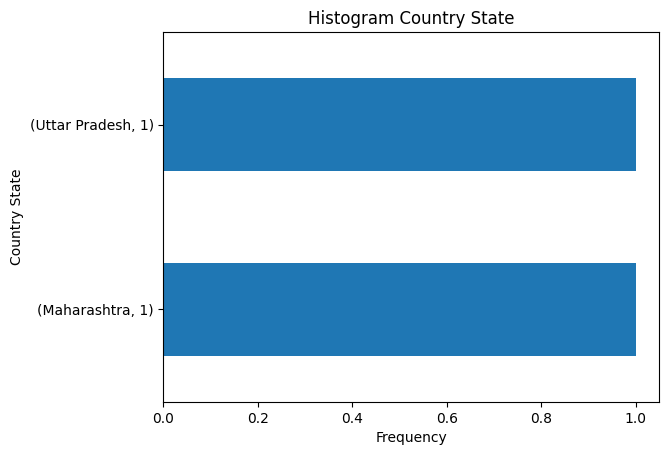

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [50]:
df24 = df1.loc[df["actualdeath24hrs"] != 0, ["state_name", "actualdeath24hrs"]]
df24.value_counts().plot.barh()
plt.xlabel('Frequency')
plt.ylabel('Country State')
plt.title('Histogram Country State')
plt.show()


diketahui bahwa untuk negara bagian uttar pradesh dan maharashtra dalam 24 jam terdapat orang yang meninggal akibat covid dengan jumlah masing-masing 1 orang

Data Insight

<Figure size 100x1000 with 0 Axes>

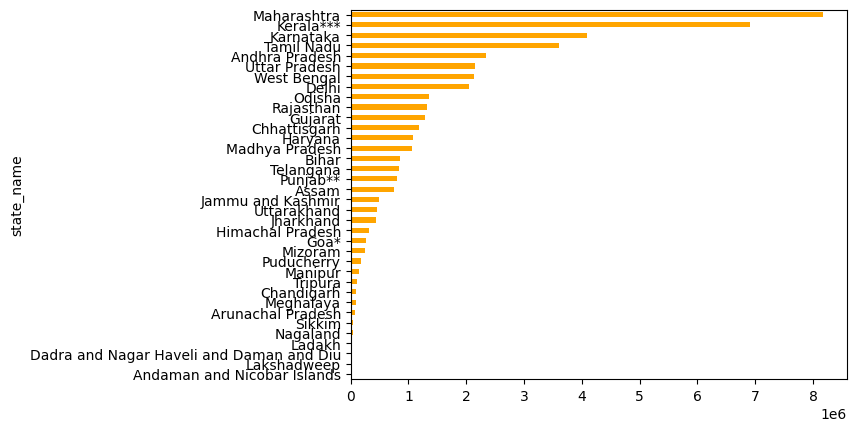

In [54]:
dfpositive = df1.sort_values(by='positive',ascending=False)
dfpositive.plot.barh(x='state_name', y='positive', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.show()

Negara bagian Maharashtra menjadi negara bagian dengan tingkat kasus positive tertinggi dengan jumlah lebih dari 80 ribu orang

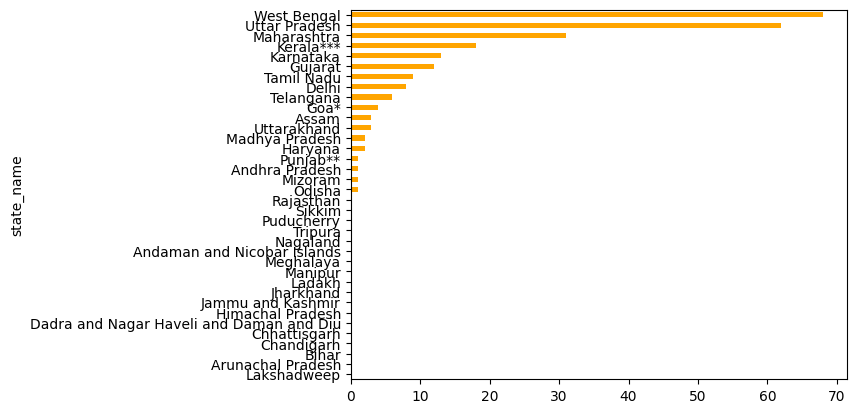

In [55]:
dfpositive = df1.sort_values(by='active',ascending=False)
dfpositive.plot.barh(x='state_name', y='active', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.show()

Negara bagian West Bengal menjadi negara bagian dengan tingkat kasus active tertinggi dengan jumlah hampir 70 orang

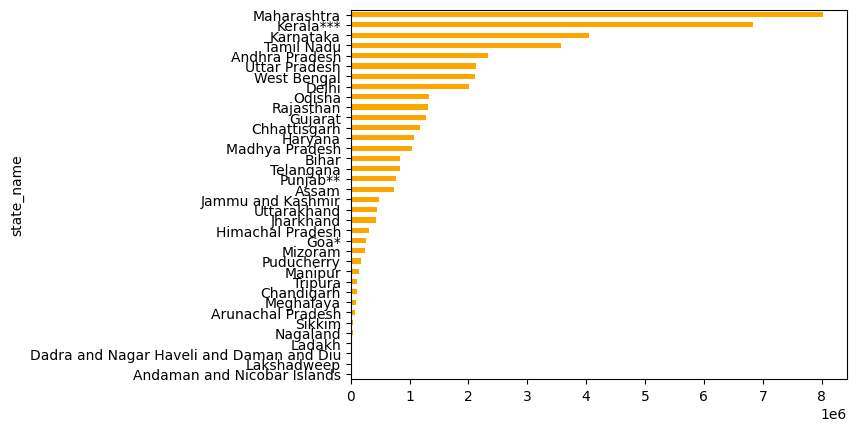

In [56]:
dfpositive = df1.sort_values(by='cured',ascending=False)
dfpositive.plot.barh(x='state_name', y='cured', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.show()

walaupun tingkat positive tinggi akan tetapi negara bagian Marashtra juga memiliki tingkat kesembuhan paling tinggi

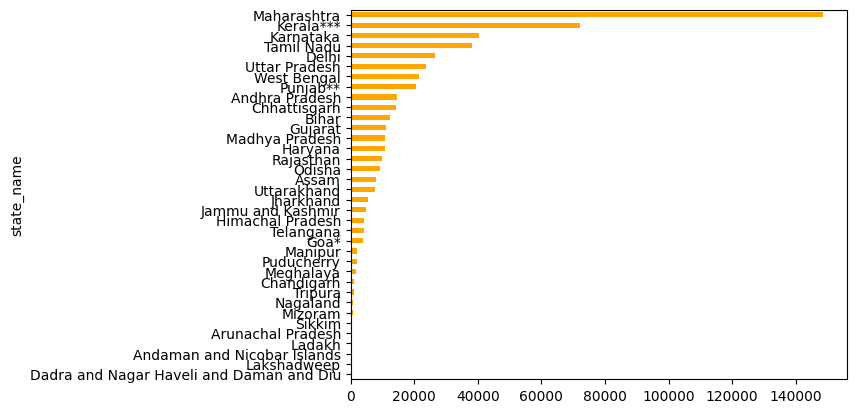

In [57]:
dfpositive = df1.sort_values(by='death',ascending=False)
dfpositive.plot.barh(x='state_name', y='death', color='orange', legend=False)
plt.gca().invert_yaxis()
plt.show()

Disisi lain Maharashtra juga memiliki tingkat kematian akibat covid tertinggi

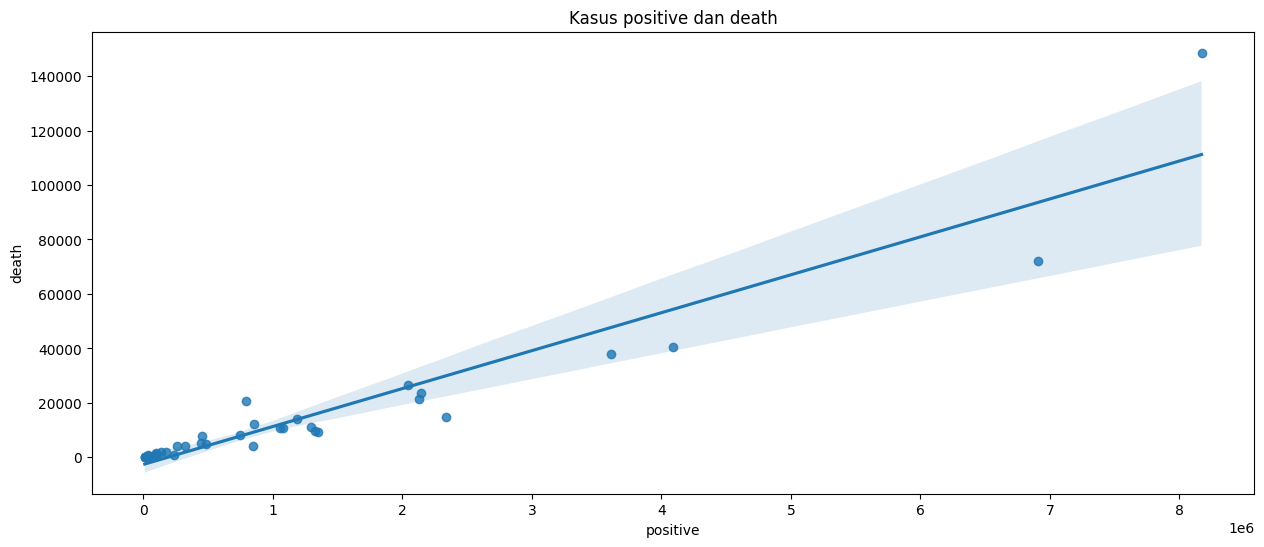

In [58]:
plt.figure(figsize = (15 , 6))
sns.regplot( x= df1['positive'] ,y=df1['death'])
plt.title('Perbandingan kasus positive dan death')
plt.show()

Dari korelasi positif tersebut diketahui bahwa semakin tinggi tingkat positive akan semakin tinggi juga resiko akan kematian 

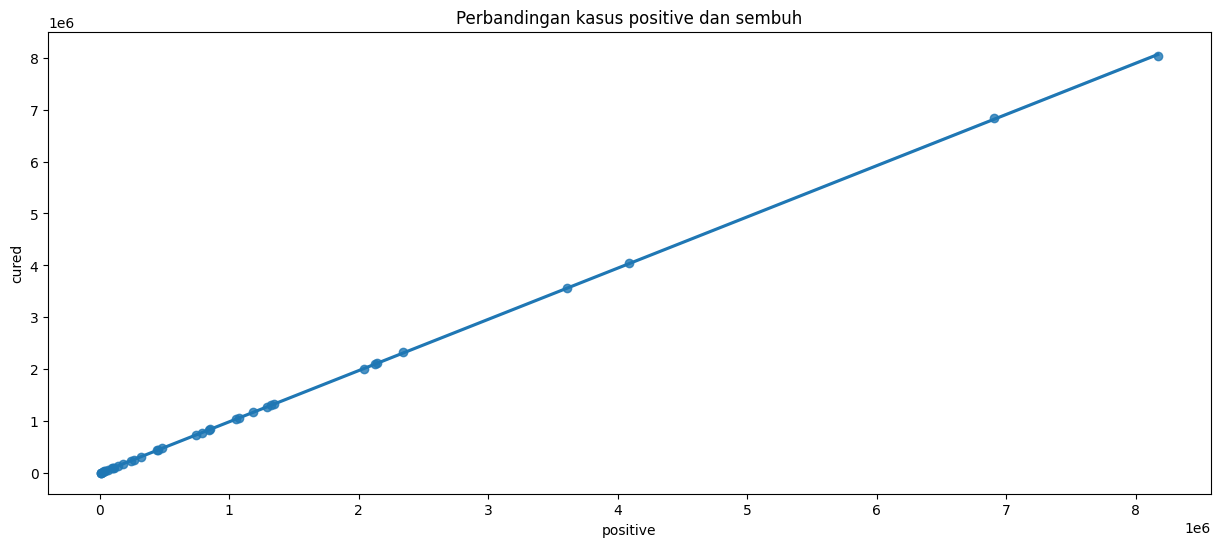

In [59]:
plt.figure(figsize = (15 , 6))
sns.regplot( x= df1['positive'] ,y=df1['cured'])
plt.title('Perbandingan kasus positive dan sembuh')
plt.show()

Akan tetapi dari korelasi tersebut juga semakin banyak yang positive angka kesembuhan juga menjadi yang paling tinggi, hubungan ini sangat kuat dari plot yang sempurna pada garis korelasi

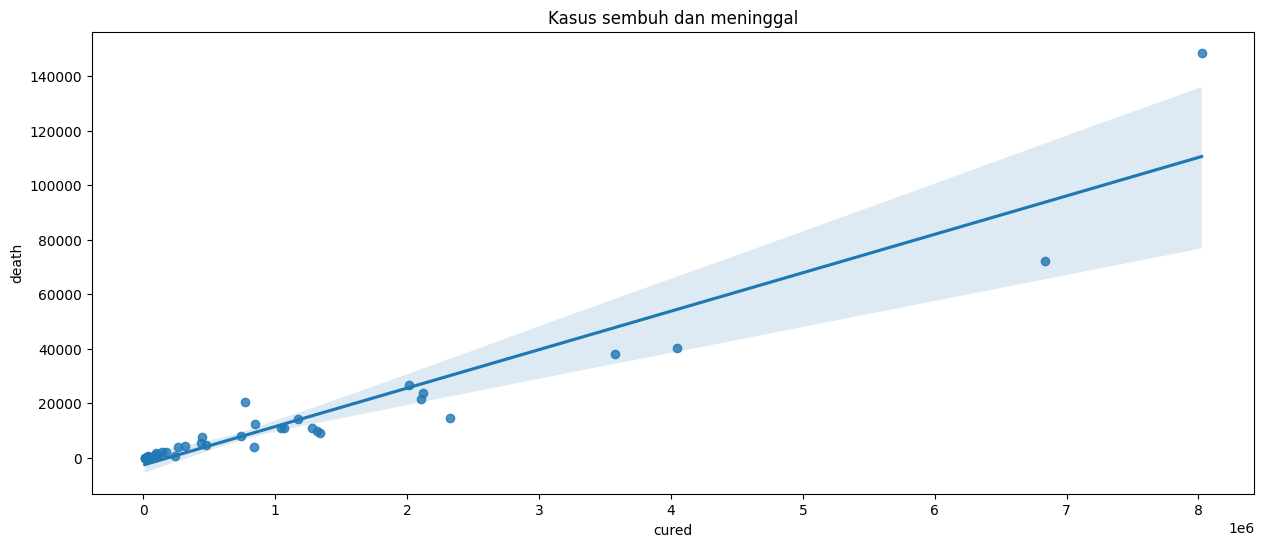

In [94]:
plt.figure(figsize = (15 , 6))
sns.regplot( x= df1['cured'] ,y=df1['death'])
plt.title('Kasus sembuh dan meninggal')
plt.show()

Antara kasus sembuh dan meninggal ini juga berbanding lurus dengan banyak kasus positif resiko sembuh dan meninggal ini pada angka yang cukup tinggi

In [93]:
dfpresentase = df1.copy()
dfpresentase["presentasesembuh"] =  (dfpresentase["cured"] /dfpresentase["positive"] ) * 100
dfpresentase["presentasemati"] = (dfpresentase["death"] /dfpresentase["positive"] ) * 100


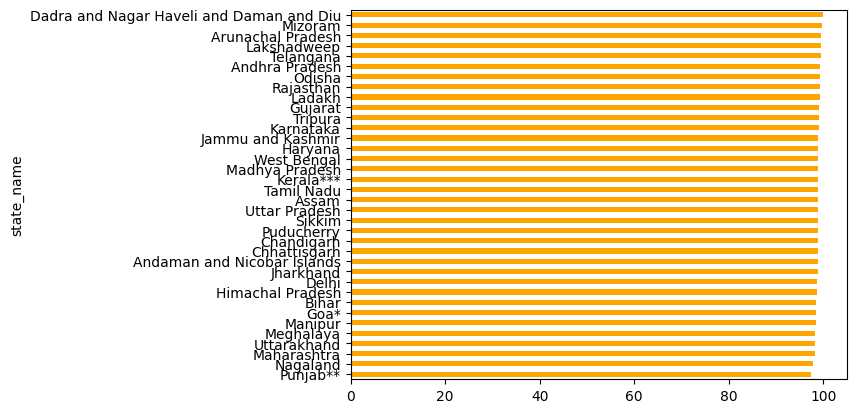

In [97]:
dfsembuh = dfpresentase.sort_values(by='presentasesembuh',ascending=False)
dfsembuh.plot.barh(x="state_name", y="presentasesembuh", color="orange", legend=False)
plt.gca().invert_yaxis()
plt.show()

Negara bagian Dadra memiliki tingkat kesembuhan terbaik dibandingkan negara bagian lain, negara bagian punjabi memiliki presentase kesembuhan yang rendah meskipun masih diangka lebih dari 90%

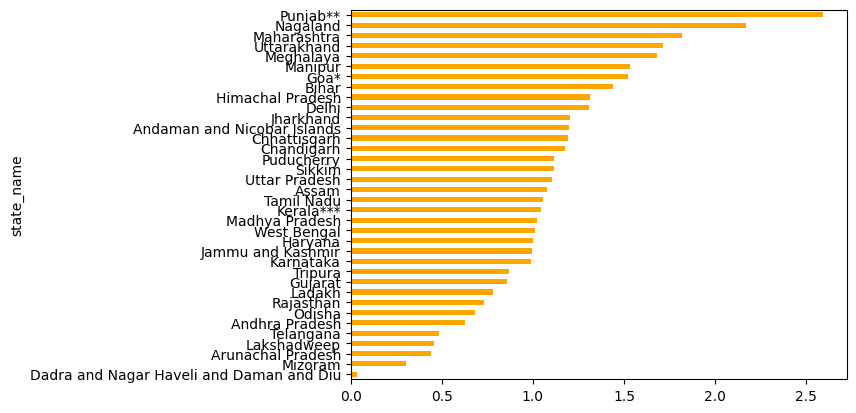

In [100]:
dfmati = dfpresentase.sort_values(by='presentasemati',ascending=False)
dfmati.plot.barh(x="state_name", y="presentasemati", color="orange", legend=False)
plt.gca().invert_yaxis()
plt.show()


Sejalan dengan korelasi sebelumnya Negara bagian punjabi memiliki tingkat kematian yang paling tinggi dengan presentase lebih dari 2.5%

Kasus baru

In [102]:
dfpresentase2 = df1.copy()
dfpresentase2["presentasenewsembuh"] =  (dfpresentase2["new_cured"] /dfpresentase2["new_positive"] ) * 100
dfpresentase2["presentasenewmati"] = (dfpresentase2["new_death"] /dfpresentase2["new_positive"] ) * 100
dfpresentase2

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,actualdeath24hrs,presentasenewsembuh,presentasenewmati
0,1,Andaman and Nicobar Islands,0,10766,10637,129,0,10766,10637,129,0,98.801783,1.198217
1,2,Andhra Pradesh,1,2340677,2325943,14733,1,2340677,2325943,14733,0,99.370524,0.629433
2,3,Arunachal Pradesh,0,67049,66753,296,0,67049,66753,296,0,99.558532,0.441468
3,4,Assam,3,746163,738125,8035,4,746164,738125,8035,0,98.922623,1.076841
4,5,Bihar,0,855267,842953,12314,0,855267,842953,12314,0,98.560216,1.439784
5,6,Chandigarh,0,100697,99512,1185,0,100697,99512,1185,0,98.823202,1.176798
6,7,Chhattisgarh,0,1187697,1173507,14190,0,1187697,1173507,14190,0,98.805251,1.194749
7,8,Dadra and Nagar Haveli and Daman and Diu,0,11592,11588,4,0,11592,11588,4,0,99.965493,0.034507
8,9,Delhi,8,2041085,2014411,26666,9,2041089,2014414,26666,0,98.693100,1.306459
9,10,Goa*,4,263369,259351,4014,4,263369,259351,4014,0,98.474384,1.524097


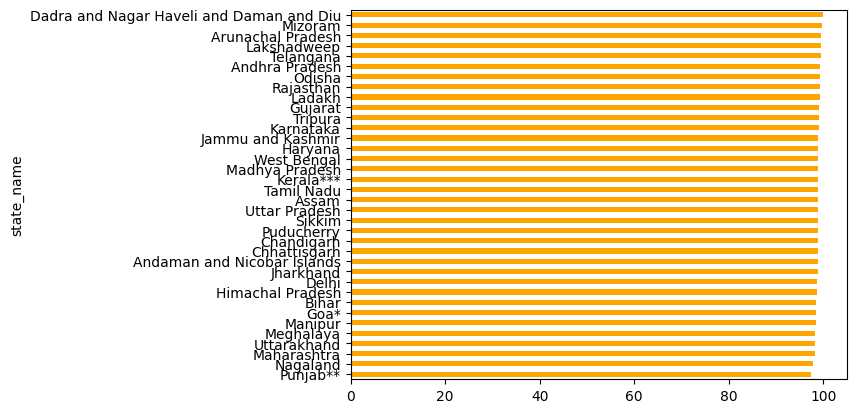

In [103]:
dfnewsembuh = dfpresentase2.sort_values(by='presentasenewsembuh',ascending=False)
dfnewsembuh.plot.barh(x="state_name", y="presentasenewsembuh", color="orange", legend=False)
plt.gca().invert_yaxis()
plt.show()

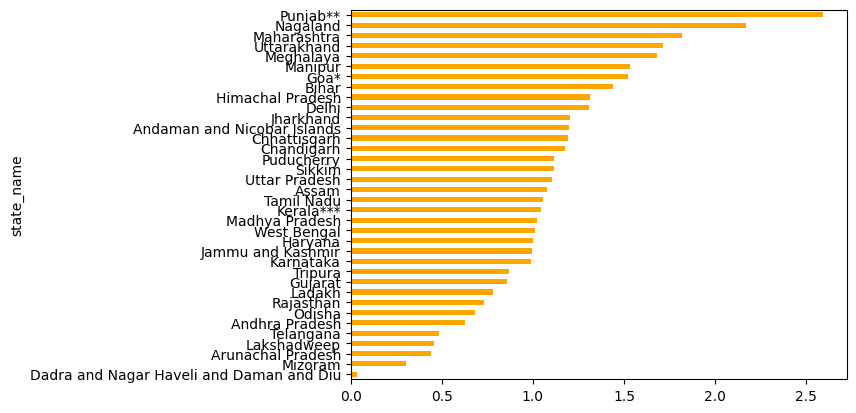

In [104]:
dfnewsembuh = dfpresentase2.sort_values(by='presentasenewmati',ascending=False)
dfnewsembuh.plot.barh(x="state_name", y="presentasenewmati", color="orange", legend=False)
plt.gca().invert_yaxis()
plt.show()

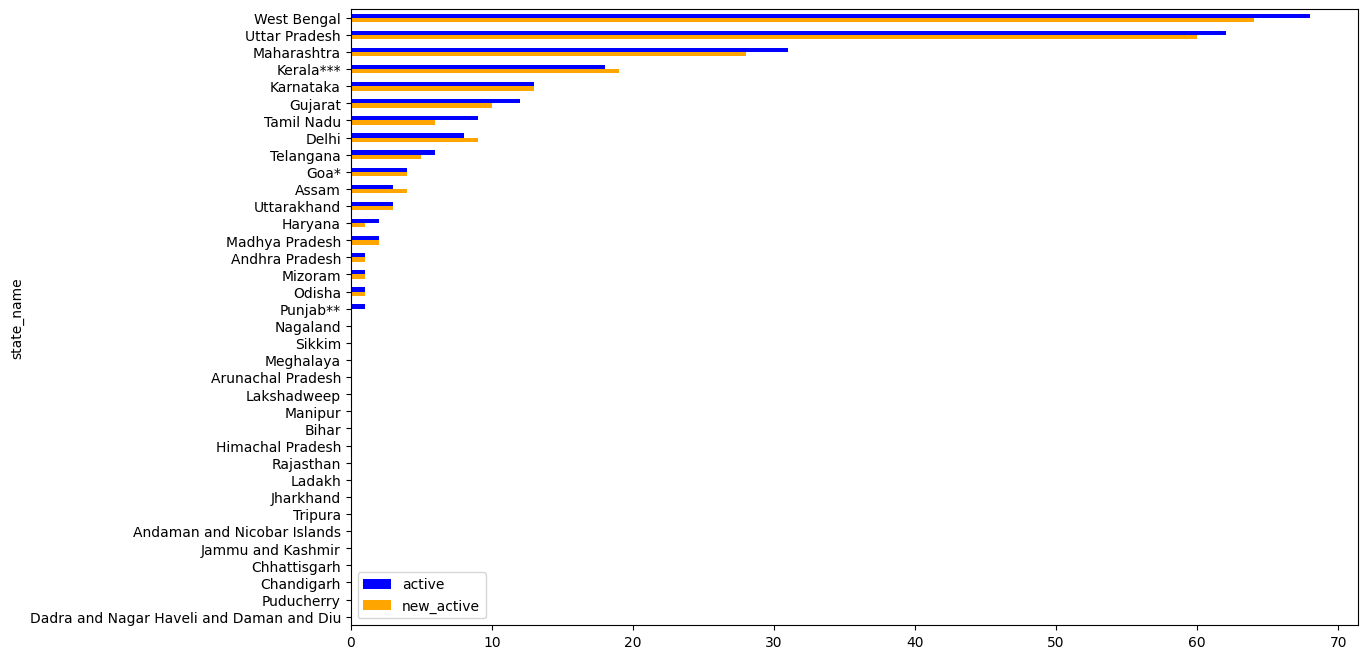

In [113]:
dfgraph=dfnewsembuh[["state_name",'active', 'new_active']].sort_values(by="active", ascending=False)
dfgraph = dfgraph.set_index("state_name")
dfgraph.plot.barh(color={"active": "blue", "new_active": "orange"},figsize=(13,8))
plt.gca().invert_yaxis()
plt.show()

Grafik diatas menunjukkan kasus active dan juga kasus active yang baru untuk setiap negara bagian, West bengal menjadi yang paling tertinggi, akan tetapi negara bagian seperti keralam, delhi, assam ini memiliki kasus aktif baru yang tinggi. Oleh karena itu 3 negara bagian ini bisa menjadi prioritas untuk tindakan pencegahan agar tidak banyak timbul kasus baru. Sedangkan fokus lebih dari segi pengobatan bisa dipusatkan di Punjabi karena masih memiliki presentase kematian yang paling tinggi dibandingkan dengan negara bagian lain.